# 实验分为两块，机器学习和深度学习

## 1.机器学习

### 1.1机器学习数据处理

In [33]:
# 导包
import random
import cv2
import joblib
import numpy
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [34]:
# def mk_dataset(  # 图像数据化
train= '//training'
test= '//evaluation'
validation= '//validation'
# ):
train_path = os.getcwd()+train              # 训练集的绝对路径
test_path  = os.getcwd()+test               # 测试集的绝对路径
vail_path  = os.getcwd()+validation         # 验证集的绝对路径
print(train_path)
print(test_path)
print(vail_path)

D:\2020185_and_10208\Kernel_Class\Machine-Learning\Coursr_Design\Experiment2//training
D:\2020185_and_10208\Kernel_Class\Machine-Learning\Coursr_Design\Experiment2//evaluation
D:\2020185_and_10208\Kernel_Class\Machine-Learning\Coursr_Design\Experiment2//validation


In [35]:
label = {'food': 0, 'non_food': 1}
LABEL = ['food','non_food']
def get_data(path):       ## 参数是图像文件夹的路径
    di = os.listdir(path)
    X = []          # 用作装数据
    Y = []          # 用作装标签
    for i in di:
        for j in list(os.walk(os.path.join(path, i)))[-1][-1]:
            img = cv2.imread(os.path.join(path, i) + '\\' + j)
            img = cv2.resize(img, (24, 24), interpolation=cv2.INTER_CUBIC)
            X.append(img.flatten())
            Y.append(label[i])
    return X,Y

In [36]:
# 生成并打乱数据和标签
X_train,Y_train = get_data(train_path)      #  训练集数据和标签
X_test,Y_test = get_data(test_path)         #  测试集数据和标签
V_data,V_label = get_data(vail_path)        #  验证集数据和标签
c = list(zip(X_train, Y_train))


random.shuffle(c)
X_train, Y_train = zip(*c)
X_train, Y_train = list(X_train), list(Y_train)

c = list(zip(X_test, Y_test))
random.shuffle(c)
X_test, Y_test = zip(*c)
X_test, Y_test = list(X_test), list(Y_test)

c = list(zip(V_data, V_label))
random.shuffle(c)
V_data, V_label = zip(*c)
V_data, V_label = list(V_data), list(V_label)

Y_train = numpy.array(Y_train)
Y_test = numpy.array(Y_test)
V_label = numpy.array(V_label)
#
print('数据初始化完成！')
#     # return X_train_path, X_test_path, X_train, Y_train, XX_test, Y_test, V_data, V_label, di

数据初始化完成！


In [37]:
# """"PCA降维——没用上"""
#     # from sklearn.decomposition import PCA
#     # X = X_train  # 导入数据，维度为65536
#     # pca = PCA(n_components=100)  # 降到100维
#     # pca.fit(X)  # 训练
#     #
#     # X_train = pca.fit_transform(X_train)
#     # XX_test = pca.fit_transform(XX_test)
#     # V_data = pca.fit_transform(V_data)

(1728,)


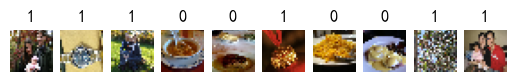

In [38]:
## 查看数据集及其标签
print(X_train[0].shape)
for i in range(10):
    plt.subplot(1,10,i+1)
    img =  X_train[i].reshape(24,24,3)  # 重构
    plt.imshow(img[:,:,::-1])           # BGR->RGB
    plt.title(str(Y_train[i]))
    plt.axis('off')                     # 不显示坐标轴
plt.show()

### 1.2机器学习模型训练

In [39]:
models = {
        'Bayes': BernoulliNB(),
        'tree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(kernel='rbf')
    }
epochs = 500
#  定义调参的超参数
C = [i/10 for i in range(1,11)]  # SVM的惩罚系数0.1到1
K = [j for j in range(1,11)]  # KNN的近邻参数1到10
SVM_ACC = {}        # 记录SVM的超参数以及在该超参数训练期间模型最好效果的准确率
KNN_ACC = {}        # 记录KNN的超参数以及在该超参数训练期间模型最好效果的准确率

In [40]:
for model in models.keys():         # 遍历字典的键，依次来索引模型
    c = list(zip(X_train, Y_train))     # 每一轮训练之前打乱数据顺序
    random.shuffle(c)
    X_train, Y_train = zip(*c)
    X_train, Y_train = list(X_train), list(Y_train)

    Acc = 0                         # 初始正确率，用于迭代
    if model == 'SVM':
        for epoch in range( epochs):
            clf = SVC(C=C[epoch // 50],kernel='rbf').fit(X_train, Y_train)      # C影响因子随着epoch变化
            acc = clf.score(V_data, V_label)                                    # 求当前模型在验证集上的精度
            print('\n')
            print(model+'第%d轮，训练集上准确率：' % epoch, clf.score(X_train, Y_train))
            print(model+'第%d轮，测试集上准确率：' % epoch, clf.score(X_test, Y_test))
            print(model+'第%d轮，验证集上准确率：' % epoch, acc)
            print('')
            if acc > Acc:                                   # 精度出现新高，就保存当前模型，并将该精度赋给Acc继续迭代
                joblib.dump( clf,model + '_best.pt')
                print(model + '准确度新高：', acc,end='\t')
                Acc = acc
            if epoch % 50 == 0:                             # 每50轮换一次影响因子，并记录这50轮中精度最高的模型
                print("惩罚系数C=%.1f在验证集上准确率:" % C[(epoch // 50)], acc)
                SVM_ACC[str(C[epoch // 50])] = acc

    elif model == 'KNN':                                    #同上
        for epoch in range(epochs):
            clf = KNeighborsClassifier(n_neighbors=K[epoch // 50]).fit(X_train, Y_train)
            acc = clf.score(V_data, V_label)
            print('\n')
            print(model + '第%d轮，训练集上准确率：' % epoch, clf.score(X_train, Y_train))
            print(model + '第%d轮，测试集上准确率：' % epoch, clf.score(X_test, Y_test))
            print(model + '第%d轮，验证集上准确率：' % epoch, acc)
            if acc > Acc:
                joblib.dump( clf,model + '_best.pt')
                print(model+'准确度新高：',acc,end='\t')
                Acc = acc
            if epoch % 50 == 0:
                print("邻居数K=%.1f在验证集上准确率:" % K[epoch // 50], acc)
                KNN_ACC[str(K[epoch // 50])] = acc
    else:
        for epoch in range(1,epochs+1):
            clf = models[model].fit(X_train, Y_train)
            acc = round(clf.score(V_data, V_label), 4)
            print('\n')
            print(model + '第%d轮，训练集上准确率：' % epoch, clf.score(X_train, Y_train))
            print(model + '第%d轮，测试集上准确率：' % epoch, clf.score(X_test, Y_test))
            print(model + '第%d轮，验证集上准确率：' % epoch, acc)
            if acc > Acc:
                joblib.dump(clf, model + '_best.pt')
                print(model + '准确度新高：', acc,end='\t')
                Acc = acc
    predictions_labels = clf.predict(X_test)
    print(u'预测结果:')
    print(predictions_labels)
    print(u'算法评价:')
    print(classification_report(Y_test, predictions_labels))

plt.subplot(1, 2, 1)
plt.plot([float(i) for i in list(SVM_ACC.keys())], list(SVM_ACC.values()), c='red') # 模型随超参数精度的变化曲线
plt.xlabel('惩罚因子C')
plt.ylabel('验证集上的准确率')
plt.title('SVM调参图')
plt.savefig('SVM.jpg')

plt.subplot(122)
plt.plot([float(i) for i in list(KNN_ACC.keys())], list(KNN_ACC.values()), c='red')  # 模型随超参数精度的变化曲线
plt.xlabel('邻居值K')
plt.ylabel('验证集上的准确率')
plt.title('KNN调参图')
plt.savefig('KNN.jpg')

plt.show()          # 显示出图像，由于我不是在本机上训练的，结果图键Figure_1
#这一趟遍历下来一共运行了2000轮训练，最后保存了4个最好的模型。据观察，这些模型在训练集上的效果只是在80%+，属于是欠拟合的状态，锁着训练轮数的不断增加能达到最终你和的效果



Bayes第1轮，训练集上准确率： 0.5826666666666667
Bayes第1轮，测试集上准确率： 0.537
Bayes第1轮，验证集上准确率： 0.568
Bayes准确度新高： 0.568	

Bayes第2轮，训练集上准确率： 0.5826666666666667
Bayes第2轮，测试集上准确率： 0.537
Bayes第2轮，验证集上准确率： 0.568


Bayes第3轮，训练集上准确率： 0.5826666666666667
Bayes第3轮，测试集上准确率： 0.537
Bayes第3轮，验证集上准确率： 0.568


Bayes第4轮，训练集上准确率： 0.5826666666666667
Bayes第4轮，测试集上准确率： 0.537
Bayes第4轮，验证集上准确率： 0.568


Bayes第5轮，训练集上准确率： 0.5826666666666667
Bayes第5轮，测试集上准确率： 0.537
Bayes第5轮，验证集上准确率： 0.568


Bayes第6轮，训练集上准确率： 0.5826666666666667
Bayes第6轮，测试集上准确率： 0.537
Bayes第6轮，验证集上准确率： 0.568


Bayes第7轮，训练集上准确率： 0.5826666666666667
Bayes第7轮，测试集上准确率： 0.537
Bayes第7轮，验证集上准确率： 0.568


Bayes第8轮，训练集上准确率： 0.5826666666666667
Bayes第8轮，测试集上准确率： 0.537
Bayes第8轮，验证集上准确率： 0.568


Bayes第9轮，训练集上准确率： 0.5826666666666667
Bayes第9轮，测试集上准确率： 0.537
Bayes第9轮，验证集上准确率： 0.568


Bayes第10轮，训练集上准确率： 0.5826666666666667
Bayes第10轮，测试集上准确率： 0.537
Bayes第10轮，验证集上准确率： 0.568


Bayes第11轮，训练集上准确率： 0.5826666666666667
Bayes第11轮，测试集上准确率： 0.537
Bayes第11轮，验证集上准确率： 0.568


Bayes第12轮，训练集上准确率

KeyboardInterrupt: 

### 1.3机器学习数据分析

100%|██████████| 1000/1000 [00:06<00:00, 162.20it/s]


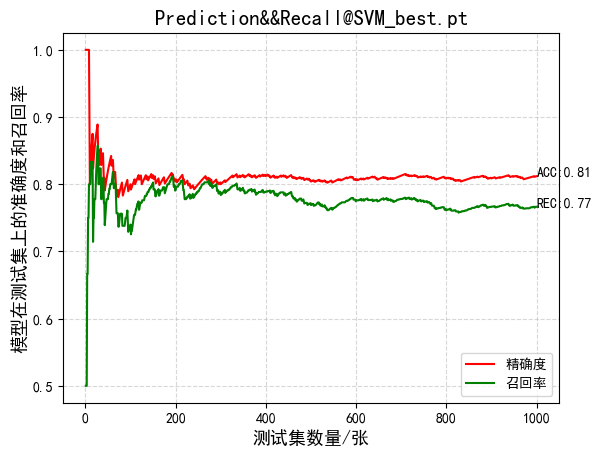

In [41]:
model_name = 'SVM_best.pt'#KNN_best.pt/bayes_best.pt/tree_best.pt
clf = joblib.load('models/'+model_name)
correct = 0
pre = []
for i in tqdm(range(len(X_test))):
    if clf.predict([X_test[i]])[0] == Y_test[i]:
        correct += 1
    p = correct / (i+1)
    pre.append(p)

wrong = 0
right = 0
rec = []
for i in tqdm(range(len(X_test))):
    if clf.predict([X_test[i]])[0] == Y_test[i] and Y_test[i] == 0:
        right += 1
    if clf.predict([X_test[i]])[0] != Y_test[i] and Y_test[i] == 0:
        wrong += 1
    rec.append(right/(right+wrong+1))

X = [i+1 for i in range(len(X_test))]
Y = [j for j in pre]
Y_rec = [j for j in rec]
plt.plot(X,Y,c='red',label='精确度')
plt.plot(X,Y_rec,c='green',label='召回率')
plt.text(X[-1],Y[-1],s='ACC:%.2f'%Y[-1])
plt.text(X[-1],Y_rec[-1],s='REC:%.2f'%Y_rec[-1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('测试集数量/张',fontsize=13)
plt.ylabel('模型在测试集上的准确度和召回率',fontsize=13)
plt.title('Prediction&&Recall@'+model_name,fontsize=15)
plt.legend(loc="lower right")
plt.savefig('figures/'+model_name.split('.')[0]+'.jpg')
plt.show()

### 1.4机器学习模型部署

#### 1.4.1本地部署

In [42]:
LABEL = ['food','non_food']
cap = cv2.VideoCapture(0)                               # 获取摄像头，传入0表示获取系统默认摄像头
cap.open(0)                                             # 打开cap
text = ''
while cap.isOpened():                                   # 无限循环，直到break被触发
    success, frame = cap.read()                         # 获取画面
    if not success:
        print('Error')
        break
    img0 = cv2.resize(img, (24, 24), interpolation=cv2.INTER_CUBIC).flatten()
    text = LABEL[clf.predict([img0])[0]]
    cv2.putText(frame, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('111', frame)  # 展示处理后的三通道图像
    if cv2.waitKey(100) in [ord('q'), 27]:  # 按键盘上的q或esc退出（在英文输入法下）
        break
cap.release()  # 关闭摄像头
cv2.destroyAllWindows()  # 关闭图像窗口

#### 1.4.2识别图像

In [10]:
dic_name = 'test/'
pic = [dic_name+i for i in os.listdir(dic_name)]  # dic_name下所有图像路径
for i in tqdm(range(len(pic))):
    path = pic[i]
    img = cv2.imread(path)
    img0 = cv2.resize(img, (24, 24), interpolation=cv2.INTER_CUBIC).flatten()
    text = LABEL[clf.predict([img0])[0]]
    cv2.putText(img, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('111',img )  # 展示处理后的三通道图像
    if cv2.waitKey(1000) in [ord('q'), 27]:  # 按键盘上的q或esc退出（在英文输入法下）
        break
cv2.destroyAllWindows()  # 关闭图像窗口

  2%|▏         | 19/1000 [00:20<17:30,  1.07s/it]


#### 1.4.3识别视频

In [44]:
video_path = 'videos/be787af4c405e2e5c31f60437f2f59b4.mp4'
cap = cv2.VideoCapture(video_path)
while True:
    res, image = cap.read()  # 读出图片。res表示是否读取到图片，image表示读取到的每一帧图片
    if not res:
        print('图片提取结束')
        break
    Img = cv2.resize(image, (24, 24), interpolation=cv2.INTER_CUBIC).flatten()
    text = LABEL[clf.predict([Img])[0]]
    cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('Gosling can not be more handsome', image)  # 展示处理后的三通道图像
    if cv2.waitKey(100) in [ord('q'), 27]:  # 按键盘上的q或esc退出（在英文输入法下）
        break
cap.release()  # 关闭摄像头
cv2.destroyAllWindows()  # 关闭图像窗口

## 2.深度学习

In [10]:
# 导包
import os
import numpy as np
from tqdm import tqdm
from torchvision import datasets
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cpu


In [11]:
# 训练集图像预处理：缩放裁剪、图像增强、转 Tensor、归一化
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                                    ])

### 2.1深度学习数据处理

In [12]:
dataset_dir = ''
train_path = os.path.join(dataset_dir, 'training')
test_path = os.path.join(dataset_dir, 'validation')
print('训练集路径', train_path)
print('测试集路径', test_path)

训练集路径 training
测试集路径 validation


In [13]:
# 载入训练集
train_dataset = datasets.ImageFolder(train_path, train_transform)   #  返回训练数据与标签(标签是文件夹名字）

# 载入测试集
test_dataset = datasets.ImageFolder(test_path, test_transform)

In [14]:
train_dataset.class_to_idx      # 类别以及对应的标签（自动生成不用自己标注）

{'food': 0, 'non_food': 1}

In [15]:
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}
idx_to_labels  # 改变映射关系，因为最终是要根据预测的结果（键）来对应类别（值）

{0: 'food', 1: 'non_food'}

In [16]:

BATCH_SIZE = 32

# 训练集的数据加载器
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,  # 每次计算32个样本
                          shuffle=True,  # 在每个epochs计算式打乱数据
                          num_workers=4  # 进程数，相当于在同一时刻计算4*32=108张图片
                          )

# 测试集的数据加载器
test_loader = DataLoader(test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                         )
"""上述以dataloader为单位将数据喂给模型"""

'上述以dataloader为单位将数据喂给模型'

### 2.2深度学习模型训练

In [17]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 改变全连接层，映射到n_class维度，这里是二分类，n_class=2，model.fc是整个网络
optimizer = optim.Adam(model.fc.parameters())  # 构造优化器，用来保存当前的状态，并能够根据计算得到的梯度来更新参数
model = model.to(device)  # 这一步很奇妙，就18个字母，就能把这么庞大的，几百层的深度神经网络加到GPU/CPU
criterion = nn.CrossEntropyLoss()

# 训练轮次 Epoch
EPOCHS = 3000
Acc = 0

In [ ]:
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # 获得一个 batch 的数据和标注
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels) # 计算当前 batch 中，每个样本的平均交叉熵损失函数值

        """反向传播三部曲，梯度清零、反向传播，优化迭代"""
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in tqdm(test_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum()
    acc = correct / total
    if acc > Acc:
        torch.save(model, 'resnet18_best.pth')
        Acc = acc

### 2.3深度学习数据分析

In [18]:
from PIL import Image


def process_frame_pth(img, model):
    model = torch.load(model, map_location=torch.device(device))
    model = model.eval().to(device)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR转RGB
    img_pil = Image.fromarray(img_rgb)  # array 转 PIL
    input_img = test_transform(img_pil).unsqueeze(0).to(device)  # 预处理
    pred_logits = model(input_img)  # 执行前向预测，得到所有类别的 logit 预测分数
    _, pred_ids = torch.max(pred_logits, 1)
    img = np.array(img_pil)  # PIL 转 array
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # RGB转BGR
    # 图片，添加的文字，左上角坐标，字体，字体大小，颜色，线宽，线型
    cv2.putText(img, idx_to_labels[int(pred_ids)], (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
    # return img, idx_to_labels[int(pred_ids)]  # 部署
    return img, idx_to_labels[int(pred_ids)],int(pred_ids)        # 返回标签值

In [19]:
from tqdm import tqdm
model_name = 'resnet18_best.pth'
model_name1 = 'models/'+model_name
# model = torch.load(model_name, map_location=torch.device(device))
img = 'evaluation/'  # 测试集路径
labels = os.listdir(img)
# print(labels)     #['food', 'non_food']
pic_path = []       # 所有测试集图像的路径
X = []              # 测试集向量化的数据
Y = []          # 测试集标签
for label in labels:      # 遍历类别文件夹
    path = img+label
    for pic in os.listdir(path):
        pic_path.append(path+'/'+pic)
        Y.append(labels.index(label))
ID = []
for i in tqdm(range(len(pic_path))):
    pic = pic_path[i]
    im = cv2.imread(pic)
    _,_,a = process_frame_pth(im,model_name1)
    ID.append(a)
print('图像处理完毕！')

100%|██████████| 1000/1000 [01:39<00:00, 10.06it/s]

图像处理完毕！


In [20]:
correct = 0
pre_pth = []
for i in tqdm(range(len(ID))):
    correct += ID[i]==Y[i]
    pre_pth.append(correct/(i+1))
X_label = [i+1 for i in range(len(ID))]
Y_label = [j for j in pre_pth]

100%|██████████| 1000/1000 [00:00<?, ?it/s]


In [21]:
right=0
wrong = 0
rec_pth = []
for i in range(len(ID)):
    if ID[i] == Y[i] and Y[i] == 0:
        right += 1
    if ID[i] != Y[i] and Y[i] == 0:
        wrong += 1
    rec_pth.append(right/(wrong+right+1))
print(rec_pth)

[0.5, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.875, 0.8888888888888888, 0.9, 0.9090909090909091, 0.9166666666666666, 0.9230769230769231, 0.9285714285714286, 0.9333333333333333, 0.9375, 0.9411764705882353, 0.9444444444444444, 0.9473684210526315, 0.95, 0.9523809523809523, 0.9545454545454546, 0.9565217391304348, 0.9583333333333334, 0.96, 0.9615384615384616, 0.9629629629629629, 0.9642857142857143, 0.9655172413793104, 0.9666666666666667, 0.967741935483871, 0.96875, 0.9696969696969697, 0.9705882352941176, 0.9714285714285714, 0.9722222222222222, 0.972972972972973, 0.9736842105263158, 0.9743589743589743, 0.975, 0.975609756097561, 0.9761904761904762, 0.9767441860465116, 0.9772727272727273, 0.9777777777777777, 0.9782608695652174, 0.9787234042553191, 0.9791666666666666, 0.9795918367346939, 0.98, 0.9803921568627451, 0.9807692307692307, 0.9811320754716981, 0.9814814814814815, 0.9818181818181818, 0.9821428571428571, 0.9824561403508771, 0.9827586206896551, 0.9830508474

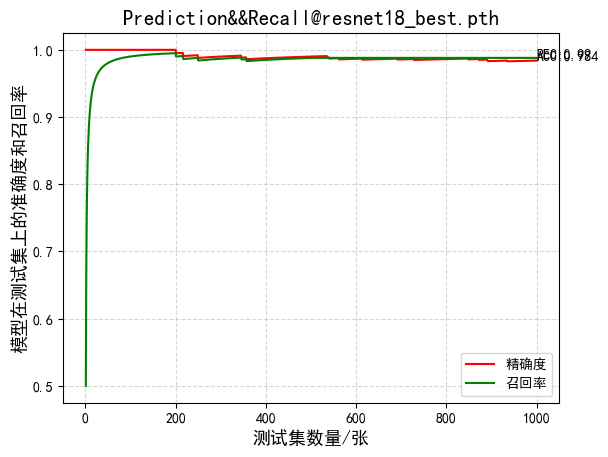

In [22]:
plt.plot(X_label,pre_pth,c='red',label='精确度')
plt.plot(X_label,rec_pth,c='green',label='召回率')
plt.text(X_label[-1],pre_pth[-1],s='ACC:%.3f'%pre_pth[-1])
plt.text(X_label[-1],rec_pth[-1],s='REC:%.2f'%rec_pth[-1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('测试集数量/张',fontsize=13)
plt.ylabel('模型在测试集上的准确度和召回率',fontsize=13)
plt.title('Prediction&&Recall@'+model_name,fontsize=15)
plt.legend(loc="lower right")
plt.savefig('figures/'+model_name.split('.')[0]+'.jpg')
plt.show()

### 2.4深度学习模型部署

#### 2.4.1本地部署

In [23]:
cap = cv2.VideoCapture(0)  # 获取摄像头，传入0表示获取系统默认摄像头
cap.open(0)  # 打开cap
text = ''
while cap.isOpened():  # 无限循环，直到break被触发
    success, frame = cap.read()  # 获取画面
    if not success:
        print('Error')
        break
    frame, text,_ = process_frame_pth(frame, model_name1)  ## !!!处理帧函数
    cv2.imshow('Gosling can not be more handsome', frame)  # 展示处理后的三通道图像
    if cv2.waitKey(100) in [ord('q'), 27]:  # 按键盘上的q或esc退出（在英文输入法下）
        break
cap.release()  # 关闭摄像头
cv2.destroyAllWindows()  # 关闭图像窗口

#### 2.4.2识别图像

In [24]:
dic_name = 'test/'
pic = [dic_name+i for i in os.listdir(dic_name)]  # dic_name下所有图像路径
for i in tqdm(range(len(pic))):
    path = pic[i]
    img = cv2.imread(path)
    im, text,_ = process_frame_pth(img, model_name1)
    cv2.imshow("Gosling can not be more handsome", im)
    if cv2.waitKey(1000) in [ord('q'), 27]:  # 按键盘上的q或esc退出（在英文输入法下）
        break
cv2.destroyWindow("Predicting")

  0%|          | 1/1000 [00:01<30:09,  1.81s/it]


#### 2.4.3识别视频

In [45]:
video_path = 'videos/be787af4c405e2e5c31f60437f2f59b4.mp4'
cap = cv2.VideoCapture(video_path)
while True:
    res, image = cap.read()  # 读出图片。res表示是否读取到图片，image表示读取到的每一帧图片
    if not res:
        print('图片提取结束')
        break
    im, text, _= process_frame_pth(image, model_name1)
    cv2.imshow('Gosling can not be more handsome', im)  # 展示处理后的三通道图像
    if cv2.waitKey(1) in [ord('q'), 27]:  # 按键盘上的q或esc退出（在英文输入法下）
        break
cap.release()  # 关闭摄像头
cv2.destroyAllWindows()  # 关闭图像窗口